<a href="https://colab.research.google.com/github/RodrigoMunoz-dev/Challenge-Telecom-X/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import requests
import pandas as pd
import json

In [2]:
telecom_xdata = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
telecom_xdata.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
customer_data = telecom_xdata['customer'].apply(pd.Series)
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [4]:
telecom_xdata = pd.concat([telecom_xdata.drop('customer', axis=1), customer_data], axis=1)

In [5]:
phone_data = telecom_xdata['phone'].apply(pd.Series)
phone_data.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [6]:
internet_data = telecom_xdata['internet'].apply(pd.Series)
internet_data.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [7]:
account_data = telecom_xdata['account'].apply(pd.Series)
account_data.head()

,Contract,PaperlessBilling,PaymentMethod,Charges
0,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [9]:
charges_data = account_data['Charges'].apply(pd.Series)
charges_data.columns = ['MonthlyCharges_account', 'TotalCharges_account']

In [11]:
account_data = pd.concat([
    account_data.drop('Charges', axis=1), # Eliminar la columna 'Charges' anidada original
    charges_data
], axis=1)

In [12]:
print("Primeras filas con las cargas separadas:")
print(telecom_xdata[['MonthlyCharges_account', 'TotalCharges_account']].head())
print("-" * 50)
print("Tipos de datos después de la expansión final:")
telecom_xdata.info()

Primeras filas con las cargas separadas:


KeyError: "None of [Index(['MonthlyCharges_account', 'TotalCharges_account'], dtype='object')] are in the [columns]"

#🔧 Transformación

In [13]:
# Drop the original nested columns from telecom_xdata
telecom_xdata = telecom_xdata.drop(['phone', 'internet', 'account'], axis=1)

# Concatenate the flattened dataframes into telecom_xdata
telecom_xdata = pd.concat([telecom_xdata, phone_data, internet_data, account_data], axis=1)

In [15]:
telecom_xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7267 non-null   object 
 1   Churn                   7267 non-null   object 
 2   gender                  7267 non-null   object 
 3   SeniorCitizen           7267 non-null   int64  
 4   Partner                 7267 non-null   object 
 5   Dependents              7267 non-null   object 
 6   tenure                  7267 non-null   int64  
 7   PhoneService            7267 non-null   object 
 8   MultipleLines           7267 non-null   object 
 9   InternetService         7267 non-null   object 
 10  OnlineSecurity          7267 non-null   object 
 11  OnlineBackup            7267 non-null   object 
 12  DeviceProtection        7267 non-null   object 
 13  TechSupport             7267 non-null   object 
 14  StreamingTV             7267 non-null   

In [16]:
# Convertir la columna, forzando los valores no numéricos a NaN
telecom_xdata['TotalCharges_account'] = pd.to_numeric(
    telecom_xdata['TotalCharges_account'],
    errors='coerce'
)

In [17]:
# Contar cuántos valores nulos hay después de la conversión
nulos_total_charges = telecom_xdata['TotalCharges_account'].isnull().sum()
print(f"Valores NaN encontrados en TotalCharges_account: {nulos_total_charges}")

Valores NaN encontrados en TotalCharges_account: 11


In [18]:
# Imputar los valores NaN con 0
telecom_xdata['TotalCharges_account'].fillna(0, inplace=True)

/tmp/ipython-input-1729721221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_xdata['TotalCharges_account'].fillna(0, inplace=True)


In [19]:
print("-" * 50)
print("Información del DataFrame después de la limpieza:")
telecom_xdata.info()

--------------------------------------------------
Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7267 non-null   object 
 1   Churn                   7267 non-null   object 
 2   gender                  7267 non-null   object 
 3   SeniorCitizen           7267 non-null   int64  
 4   Partner                 7267 non-null   object 
 5   Dependents              7267 non-null   object 
 6   tenure                  7267 non-null   int64  
 7   PhoneService            7267 non-null   object 
 8   MultipleLines           7267 non-null   object 
 9   InternetService         7267 non-null   object 
 10  OnlineSecurity          7267 non-null   object 
 11  OnlineBackup            7267 non-null   object 
 12  DeviceProtection        7267 non-null   objec

In [20]:
# Ver valores únicos de las columnas categóricas para detectar errores
for col in telecom_xdata.select_dtypes(include='object').columns:
    if col != 'customerID':
        print(f"{col}: {telecom_xdata[col].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [22]:
# Convertir Churn a numérico (1 para Yes, 0 para No, y '' a 0)
telecom_xdata['Churn'] = telecom_xdata['Churn'].replace({'Yes': 1, 'No': 0, '': 0})

# Calcular la tasa de churn general
tasa_churn = telecom_xdata['Churn'].mean()
print(f"La tasa de evasión actual es del: {tasa_churn * 100:.2f}%")

La tasa de evasión actual es del: 25.72%


/tmp/ipython-input-288847462.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_xdata['Churn'] = telecom_xdata['Churn'].replace({'Yes': 1, 'No': 0, '': 0})


#📊 Carga y análisis

/tmp/ipython-input-790503897.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telecom_xdata[telecom_xdata['Churn'] == 1]['MonthlyCharges_account'], label='Churn: Yes', shade=True)
/tmp/ipython-input-790503897.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telecom_xdata[telecom_xdata['Churn'] == 0]['MonthlyCharges_account'], label='Churn: No', shade=True)


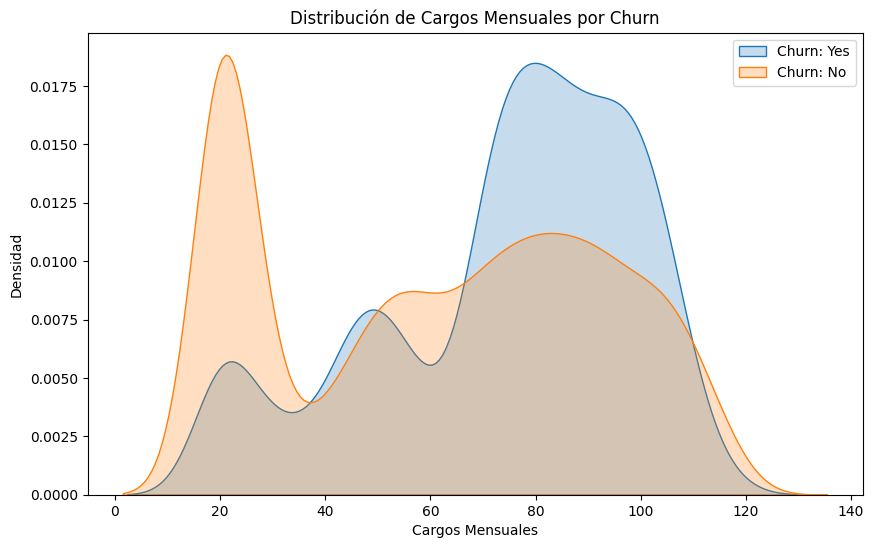

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(telecom_xdata[telecom_xdata['Churn'] == 1]['MonthlyCharges_account'], label='Churn: Yes', shade=True)
sns.kdeplot(telecom_xdata[telecom_xdata['Churn'] == 0]['MonthlyCharges_account'], label='Churn: No', shade=True)
plt.title('Distribución de Cargos Mensuales por Churn')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Densidad')
plt.legend()
plt.show()

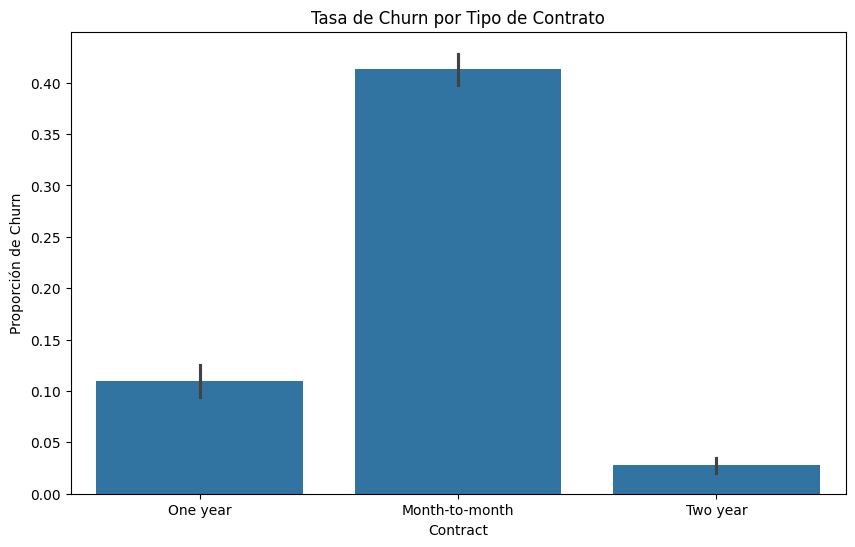

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', data=telecom_xdata)
plt.title('Tasa de Churn por Tipo de Contrato')
plt.ylabel('Proporción de Churn')
plt.show()

In [25]:
# Convertimos Churn a binario
telecom_xdata['Churn'] = telecom_xdata['Churn'].replace({'Yes': 1, 'No': 0})

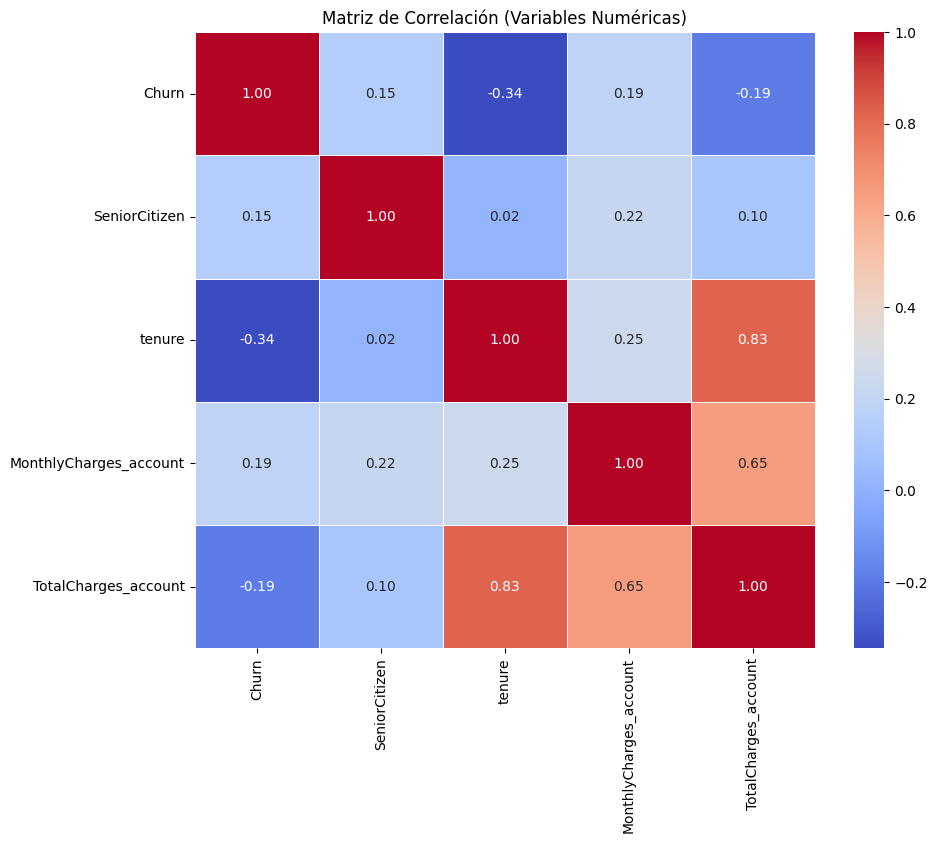

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las columnas numéricas
df_num = telecom_xdata.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación
corr_matrix = df_num.corr()

# Dibujamos el Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()

In [27]:
# Creamos variables "dummy" para las columnas categóricas
# Esto crea una columna por cada categoría (ej: Contract_Month-to-month)
df_dummies = pd.get_dummies(telecom_xdata.drop(columns=['customerID']))

# Calculamos la correlación de todas las variables con respecto a Churn
churn_corr = df_dummies.corr()['Churn'].sort_values(ascending=False)

# Mostramos las 10 variables que más positivamente y más negativamente correlacionan
print("Variables que más influyen en el Churn (Evasión):")
print(churn_corr.head(10)) # Las que más aumentan el churn
print("\nVariables que más retienen al cliente:")
print(churn_corr.tail(10)) # Las que más disminuyen el churn

Variables que más influyen en el Churn (Evasión):
Churn                             1.000000
Contract_Month-to-month           0.395584
OnlineSecurity_No                 0.335656
TechSupport_No                    0.330446
InternetService_Fiber optic       0.300949
PaymentMethod_Electronic check    0.294626
OnlineBackup_No                   0.263111
DeviceProtection_No               0.246919
MonthlyCharges_account            0.189866
PaperlessBilling_Yes              0.186666
Name: Churn, dtype: float64

Variables que más retienen al cliente:
TotalCharges_account                   -0.193345
TechSupport_No internet service        -0.224051
InternetService_No                     -0.224051
DeviceProtection_No internet service   -0.224051
OnlineBackup_No internet service       -0.224051
OnlineSecurity_No internet service     -0.224051
StreamingMovies_No internet service    -0.224051
StreamingTV_No internet service        -0.224051
Contract_Two year                      -0.295138
tenure     

#📄Informe final